In [1]:
%config IPCompleter.greedy=True
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

The attributes are (dontated by Riccardo Leardi, riclea@anchem.unige.it )
1)  Alcohol

2)  Malic acid

3)  Ash

4)  Alcalinity of ash

5)  Magnesium

6)  Total phenols

7)  Flavanoids

8)  Nonflavanoid phenols

9)  Proanthocyanins

10) Color intensity

11) Hue

12) OD280/OD315 of diluted wines

13) Proline

In [2]:
columns = ['wine Type',
           'Alcohol',
           'Malic acid',
           'Ash',
           'Alcalinity of ash',
           'Magnesium',
           'Total phenols',
           'Flavanoids',
           'Nonflavanoid phenols',
           'Proanthocyanins',
           'Color intensity',
           'Hue',
           'OD280/OD315 of diluted wines',
           'Proline']


data = pd.read_csv('data/wine.data', sep=',')
data.columns = columns


In [3]:
data.describe()

,wine Type,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,1.943503,12.993672,2.339887,2.366158,19.516949,99.587571,2.292260,2.023446,0.362316,1.586949,5.054802,0.956983,2.604294,745.096045
std,0.773991,0.808808,1.119314,0.275080,3.336071,14.174018,0.626465,0.998658,0.124653,0.571545,2.324446,0.229135,0.705103,314.884046
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.360000,1.600000,2.210000,17.200000,88.000000,1.740000,1.200000,0.270000,1.250000,3.210000,0.780000,1.930000,500.000000
50%,2.000000,13.050000,1.870000,2.360000,19.500000,98.000000,2.350000,2.130000,0.340000,1.550000,4.680000,0.960000,2.780000,672.000000
75%,3.000000,13.670000,3.100000,2.560000,21.500000,107.000000,2.800000,2.860000,0.440000,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   wine Type                     177 non-null    int64  
 1   Alcohol                       177 non-null    float64
 2   Malic acid                    177 non-null    float64
 3   Ash                           177 non-null    float64
 4   Alcalinity of ash             177 non-null    float64
 5   Magnesium                     177 non-null    int64  
 6   Total phenols                 177 non-null    float64
 7   Flavanoids                    177 non-null    float64
 8   Nonflavanoid phenols          177 non-null    float64
 9   Proanthocyanins               177 non-null    float64
 10  Color intensity               177 non-null    float64
 11  Hue                           177 non-null    float64
 12  OD280/OD315 of diluted wines  177 non-null    float64
 13  Proli

# Data analisys

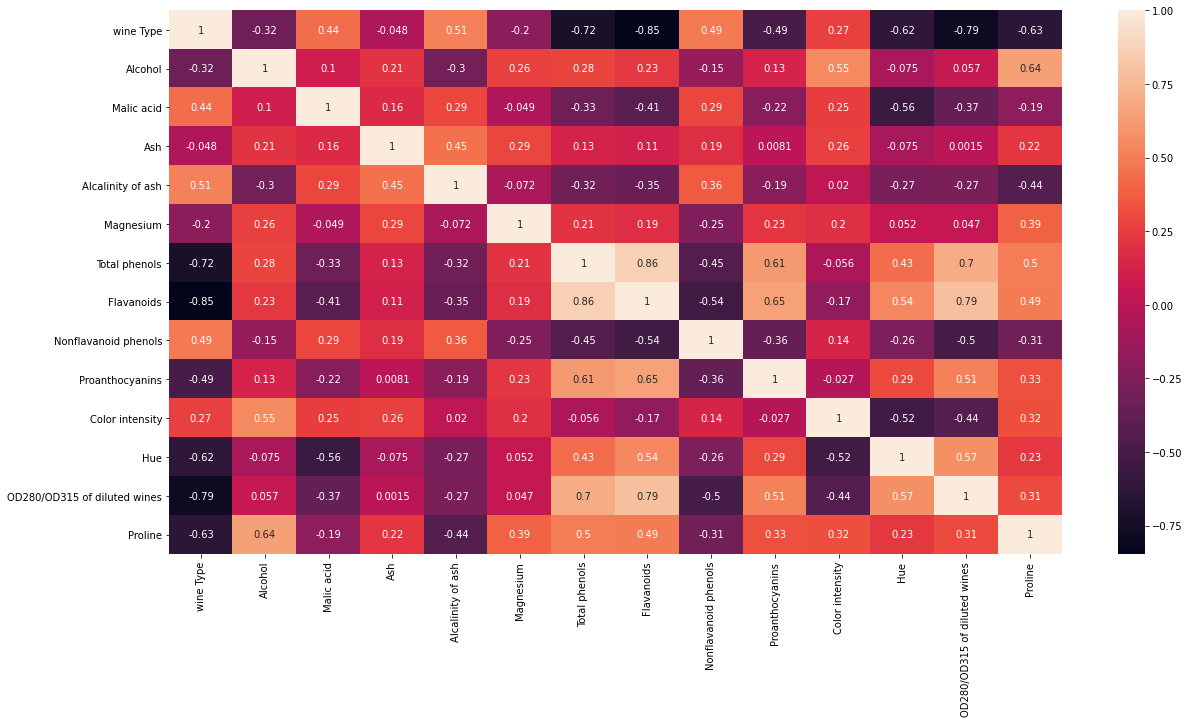

In [5]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True);

In [6]:
dataValuable = []
dataCorr     = data.corr().to_numpy()[0][1:]
aux          = dataCorr > -5
_columns = columns[1:]

print('Valuable Data to model:')
for i in range(13):
    if aux[i]:
        print('{:25}\t{:.3f} %'.format(_columns[i], 100*dataCorr[i]))
        dataValuable.append(_columns[i])
        
del aux, dataCorr


dataLabel    = data[columns[0]]
dataValuable = data[columns[1:]]

print('-'*40)

print('{:30}\t{}'.format('Data label array shape:',dataLabel.shape))
print('{:30}\t{}'.format('Valuable Data array shape:',dataValuable.shape))


Valuable Data to model:
Alcohol                  	-32.124 %
Malic acid               	43.613 %
Ash                      	-4.826 %
Alcalinity of ash        	51.396 %
Magnesium                	-19.894 %
Total phenols            	-71.793 %
Flavanoids               	-84.649 %
Nonflavanoid phenols     	48.721 %
Proanthocyanins          	-49.489 %
Color intensity          	26.856 %
Hue                      	-61.769 %
OD280/OD315 of diluted wines	-78.643 %
Proline                  	-63.123 %
----------------------------------------
Data label array shape:       	(177,)
Valuable Data array shape:    	(177, 13)


In [7]:
print('index of wine 1:[:{}]'.format(np.count_nonzero(dataLabel.to_numpy() == 1)))
print('index of wine 2:[{}:{}]'.format(np.count_nonzero(dataLabel.to_numpy() == 1),np.count_nonzero(dataLabel.to_numpy() == 1)+np.count_nonzero(dataLabel.to_numpy() == 2) ))
print('index of wine 3:[{}:]'.format(np.count_nonzero(dataLabel.to_numpy() == 1)+np.count_nonzero(dataLabel.to_numpy() == 2)))

index of wine 1:[:58]
index of wine 2:[58:129]
index of wine 3:[129:]


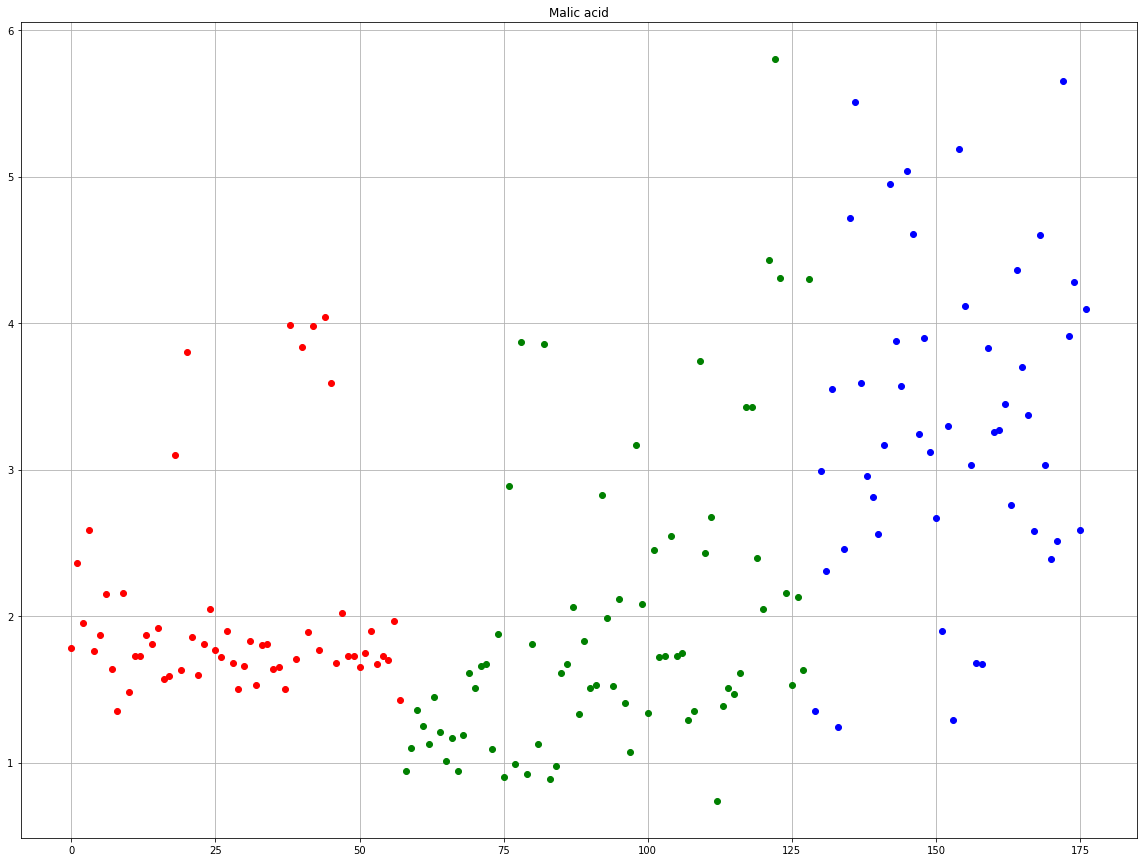

In [8]:
plt.figure(figsize=(20,15))
x = list(range(dataLabel.shape[0]))
y = dataValuable['Malic acid'].to_numpy()
plt.title('Malic acid')

plt.plot(x[:58],y[:58],'or' ) #wine 1
plt.plot(x[58:129],y[58:129],'og' ) #wine 2
plt.plot(x[129:],y[129:],'ob' ) #wine 3


plt.grid()

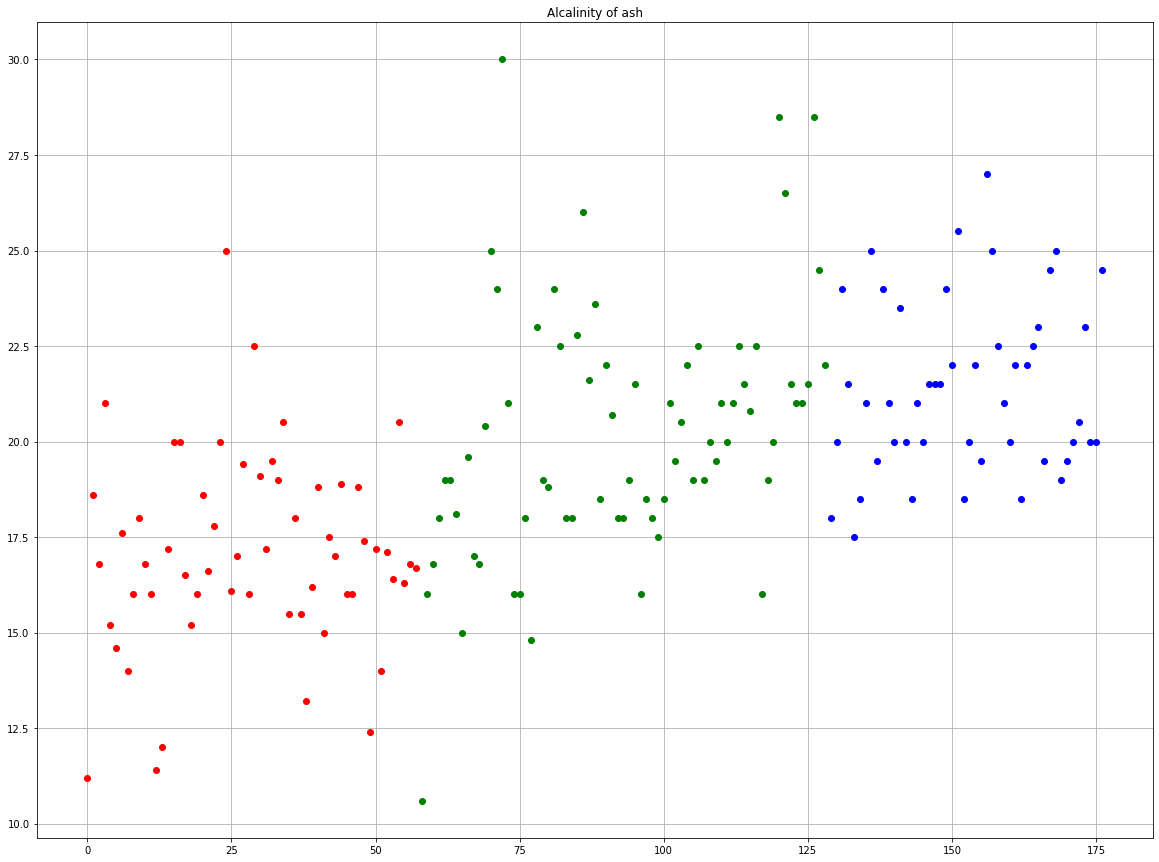

In [9]:
plt.figure(figsize=(20,15))
x = list(range(dataLabel.shape[0]))
y = dataValuable['Alcalinity of ash'].to_numpy()
plt.title('Alcalinity of ash')

plt.plot(x[:58],y[:58],'or' ) #wine 1
plt.plot(x[58:129],y[58:129],'og' ) #wine 2
plt.plot(x[129:],y[129:],'ob' ) #wine 3

plt.grid()

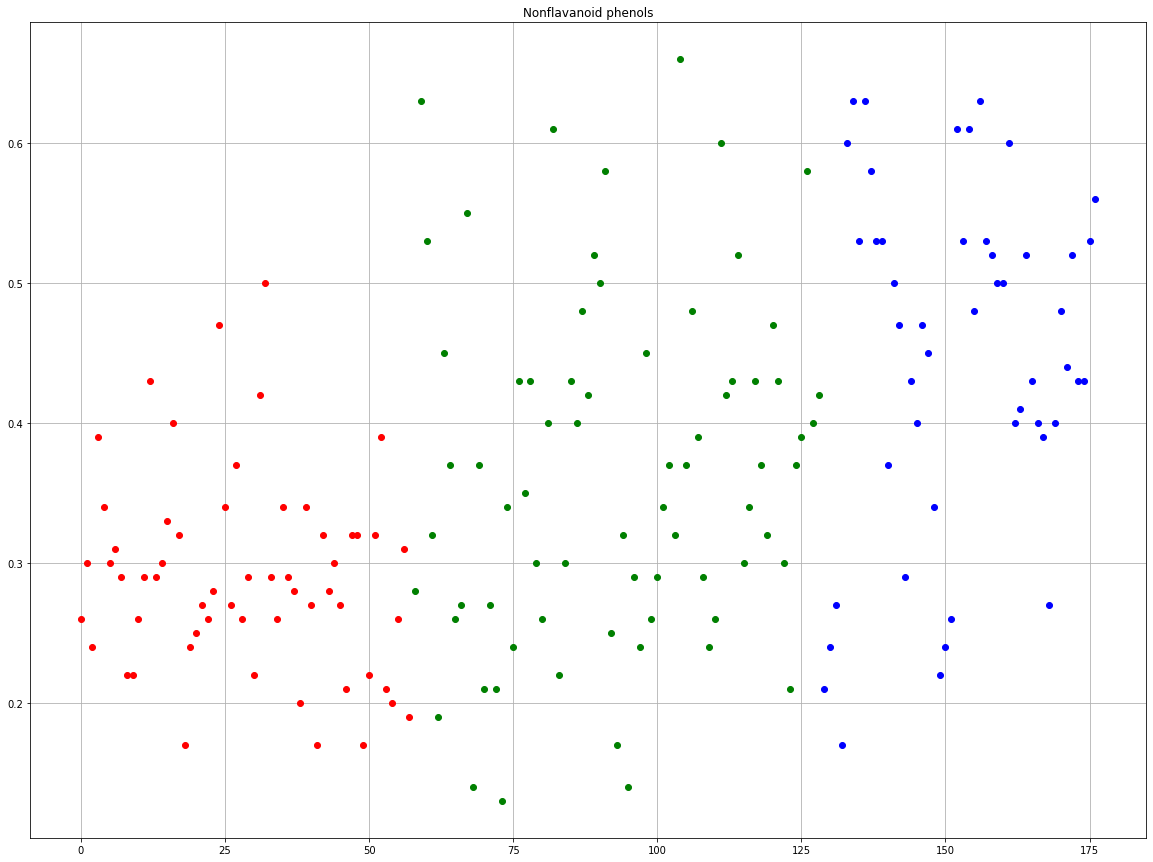

In [10]:
plt.figure(figsize=(20,15))
x = list(range(dataLabel.shape[0]))
y = dataValuable['Nonflavanoid phenols'].to_numpy()
plt.title('Nonflavanoid phenols')

plt.plot(x[:58],y[:58],'or' ) #wine 1
plt.plot(x[58:129],y[58:129],'og' ) #wine 2
plt.plot(x[129:],y[129:],'ob' ) #wine 3

plt.grid()

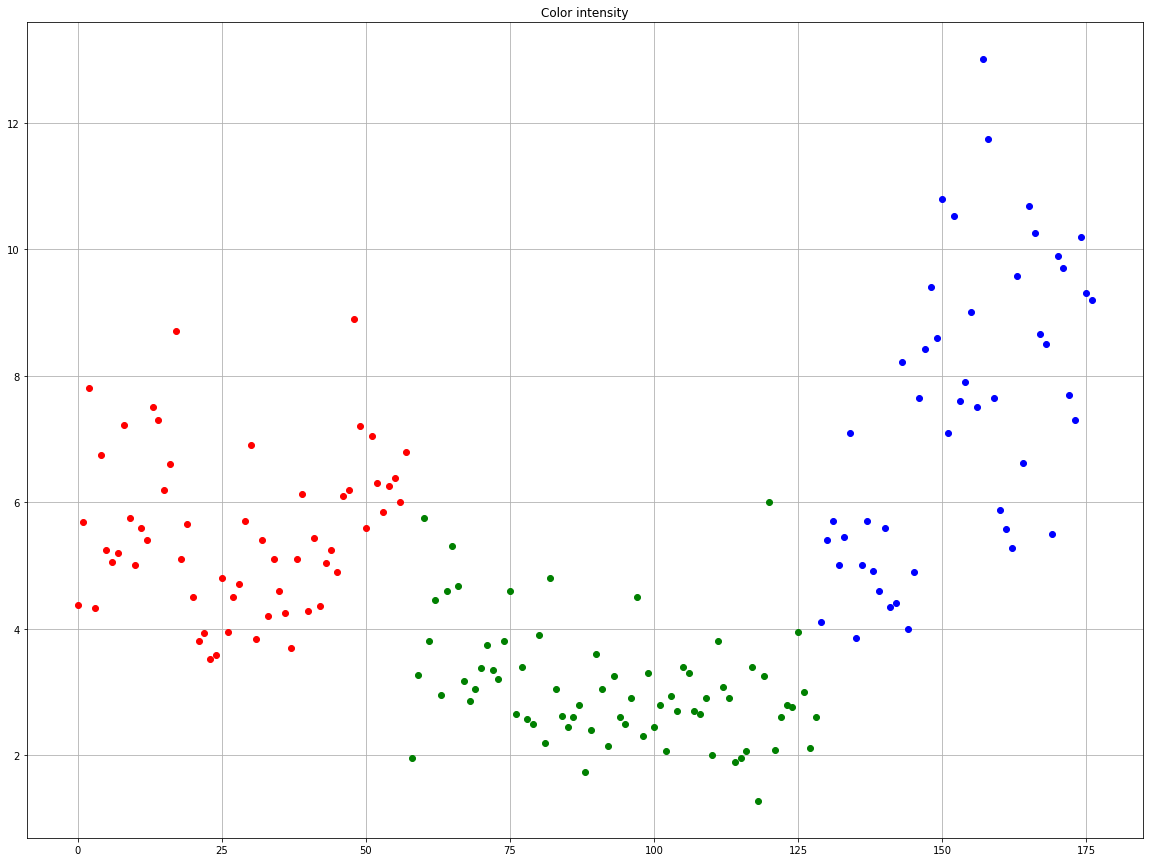

In [11]:
plt.figure(figsize=(20,15))
x = list(range(dataLabel.shape[0]))
y = dataValuable['Color intensity'].to_numpy()
plt.title('Color intensity')

plt.plot(x[:58],y[:58],'or' ) #wine 1
plt.plot(x[58:129],y[58:129],'og' ) #wine 2
plt.plot(x[129:],y[129:],'ob' ) #wine 3

plt.grid()

# model construction

In [12]:
dataLabel    = dataLabel.to_numpy() - 1
dataLabel = tf.keras.utils.to_categorical(dataLabel, 3)
dataValuable = data.to_numpy()

print('{:30}\t{}'.format('Data label array shape:',dataLabel.shape))
print('{:30}\t{}'.format('Valuable Data array shape:',dataValuable.shape))

Data label array shape:       	(177, 3)
Valuable Data array shape:    	(177, 14)


In [13]:

from sklearn.model_selection import train_test_split



dataValuableTrain, dataValuableTest, dataLabelTrain ,dataLabelTest = train_test_split(dataValuable, dataLabel, test_size=0.2, random_state=5)

nEpochs       = 500
percentSplit  = 0.2


In [35]:
modelo = tf.keras.models.Sequential()
modelo.add(tf.keras.layers.Dense( units = 50, activation = 'tanh', input_shape = (14,) ))
modelo.add(tf.keras.layers.Dropout(0.2))
modelo.add(tf.keras.layers.Dense( units = 50, activation = 'tanh' ))
modelo.add(tf.keras.layers.Dropout(0.2))
modelo.add(tf.keras.layers.Dense( units = 50, activation = 'tanh' ))
modelo.add(tf.keras.layers.Dropout(0.2))
modelo.add(tf.keras.layers.Dense( units = 50, activation = 'tanh' ))
modelo.add(tf.keras.layers.Dropout(0.2))
modelo.add(tf.keras.layers.Dense( units = 3  , activation = 'softmax' ))
modelo.compile( optimizer = 'Adamax' , loss='CategoricalCrossentropy',metrics=['accuracy'])
hist = modelo.fit(dataValuableTrain, dataLabelTrain, epochs = nEpochs, batch_size = 35, validation_split = percentSplit,verbose =1)

Epoch 1/500
4/4 [==============================] - 8s 724ms/step - loss: 1.1184 - accuracy: 0.3786 - val_loss: 0.9640 - val_accuracy: 0.4483
Epoch 2/500
4/4 [==============================] - 1s 170ms/step - loss: 1.1138 - accuracy: 0.3471 - val_loss: 0.9416 - val_accuracy: 0.4483
Epoch 3/500
4/4 [==============================] - 1s 202ms/step - loss: 1.0292 - accuracy: 0.4914 - val_loss: 0.9087 - val_accuracy: 0.4483
Epoch 4/500
4/4 [==============================] - 1s 222ms/step - loss: 1.1543 - accuracy: 0.4612 - val_loss: 0.8785 - val_accuracy: 0.6897
Epoch 5/500
4/4 [==============================] - 1s 187ms/step - loss: 1.0935 - accuracy: 0.4369 - val_loss: 0.8554 - val_accuracy: 0.6897
Epoch 6/500
4/4 [==============================] - 1s 170ms/step - loss: 0.9863 - accuracy: 0.5174 - val_loss: 0.8368 - val_accuracy: 0.6897
Epoch 7/500
4/4 [==============================] - 1s 163ms/step - loss: 0.9160 - accuracy: 0.5650 - val_loss: 0.8174 - val_accuracy: 0.6897
Epoch 8/500
4

Epoch 59/500
4/4 [==============================] - 1s 154ms/step - loss: 0.7231 - accuracy: 0.6636 - val_loss: 0.5881 - val_accuracy: 0.6207
Epoch 60/500
4/4 [==============================] - 1s 208ms/step - loss: 0.6641 - accuracy: 0.7243 - val_loss: 0.5856 - val_accuracy: 0.6552
Epoch 61/500
4/4 [==============================] - 1s 179ms/step - loss: 0.6969 - accuracy: 0.7000 - val_loss: 0.5840 - val_accuracy: 0.6207
Epoch 62/500
4/4 [==============================] - 1s 193ms/step - loss: 0.6838 - accuracy: 0.6493 - val_loss: 0.5831 - val_accuracy: 0.6207
Epoch 63/500
4/4 [==============================] - 1s 165ms/step - loss: 0.7312 - accuracy: 0.6148 - val_loss: 0.5814 - val_accuracy: 0.6207
Epoch 64/500
4/4 [==============================] - 0s 126ms/step - loss: 0.6208 - accuracy: 0.7324 - val_loss: 0.5756 - val_accuracy: 0.6552
Epoch 65/500
4/4 [==============================] - 1s 200ms/step - loss: 0.7224 - accuracy: 0.6483 - val_loss: 0.5705 - val_accuracy: 0.6552
Epoch 

4/4 [==============================] - 1s 211ms/step - loss: 0.5855 - accuracy: 0.7186 - val_loss: 0.4947 - val_accuracy: 0.7586
Epoch 117/500
4/4 [==============================] - 1s 210ms/step - loss: 0.6054 - accuracy: 0.6902 - val_loss: 0.4926 - val_accuracy: 0.7931
Epoch 118/500
4/4 [==============================] - 1s 190ms/step - loss: 0.4894 - accuracy: 0.7893 - val_loss: 0.4872 - val_accuracy: 0.7931
Epoch 119/500
4/4 [==============================] - 1s 195ms/step - loss: 0.6154 - accuracy: 0.7738 - val_loss: 0.4827 - val_accuracy: 0.8276
Epoch 120/500
4/4 [==============================] - 1s 199ms/step - loss: 0.5663 - accuracy: 0.7562 - val_loss: 0.4867 - val_accuracy: 0.7586
Epoch 121/500
4/4 [==============================] - 1s 187ms/step - loss: 0.5762 - accuracy: 0.6888 - val_loss: 0.4840 - val_accuracy: 0.7586
Epoch 122/500
4/4 [==============================] - 1s 195ms/step - loss: 0.5843 - accuracy: 0.7188 - val_loss: 0.4829 - val_accuracy: 0.8276
Epoch 123/500

4/4 [==============================] - 1s 198ms/step - loss: 0.4239 - accuracy: 0.8457 - val_loss: 0.4425 - val_accuracy: 0.8276
Epoch 174/500
4/4 [==============================] - 1s 197ms/step - loss: 0.4802 - accuracy: 0.8710 - val_loss: 0.4380 - val_accuracy: 0.8276
Epoch 175/500
4/4 [==============================] - 1s 173ms/step - loss: 0.4925 - accuracy: 0.7874 - val_loss: 0.4268 - val_accuracy: 0.8276
Epoch 176/500
4/4 [==============================] - 1s 174ms/step - loss: 0.4886 - accuracy: 0.7712 - val_loss: 0.4123 - val_accuracy: 0.8621
Epoch 177/500
4/4 [==============================] - 1s 204ms/step - loss: 0.4951 - accuracy: 0.7598 - val_loss: 0.4030 - val_accuracy: 0.8621
Epoch 178/500
4/4 [==============================] - 1s 172ms/step - loss: 0.3983 - accuracy: 0.8274 - val_loss: 0.3965 - val_accuracy: 0.8966
Epoch 179/500
4/4 [==============================] - 1s 195ms/step - loss: 0.5337 - accuracy: 0.7962 - val_loss: 0.3929 - val_accuracy: 0.8621
Epoch 180/500

4/4 [==============================] - 1s 165ms/step - loss: 0.4132 - accuracy: 0.7764 - val_loss: 0.3002 - val_accuracy: 0.9655
Epoch 231/500
4/4 [==============================] - 1s 222ms/step - loss: 0.3994 - accuracy: 0.8467 - val_loss: 0.3205 - val_accuracy: 0.9310
Epoch 232/500
4/4 [==============================] - 1s 195ms/step - loss: 0.4634 - accuracy: 0.7538 - val_loss: 0.3181 - val_accuracy: 0.9310
Epoch 233/500
4/4 [==============================] - 1s 208ms/step - loss: 0.4317 - accuracy: 0.8157 - val_loss: 0.3038 - val_accuracy: 0.9310
Epoch 234/500
4/4 [==============================] - 1s 241ms/step - loss: 0.4732 - accuracy: 0.7845 - val_loss: 0.2920 - val_accuracy: 0.9310
Epoch 235/500
4/4 [==============================] - 1s 148ms/step - loss: 0.3098 - accuracy: 0.8848 - val_loss: 0.3042 - val_accuracy: 0.8966
Epoch 236/500
4/4 [==============================] - 0s 158ms/step - loss: 0.2472 - accuracy: 0.9248 - val_loss: 0.3182 - val_accuracy: 0.8966
Epoch 237/500

4/4 [==============================] - 1s 185ms/step - loss: 0.3566 - accuracy: 0.8464 - val_loss: 0.2576 - val_accuracy: 0.9655
Epoch 288/500
4/4 [==============================] - 1s 160ms/step - loss: 0.3272 - accuracy: 0.8960 - val_loss: 0.2581 - val_accuracy: 0.9655
Epoch 289/500
4/4 [==============================] - 1s 178ms/step - loss: 0.3582 - accuracy: 0.8798 - val_loss: 0.2653 - val_accuracy: 0.9655
Epoch 290/500
4/4 [==============================] - 1s 163ms/step - loss: 0.3434 - accuracy: 0.8588 - val_loss: 0.2772 - val_accuracy: 0.8966
Epoch 291/500
4/4 [==============================] - 1s 168ms/step - loss: 0.2855 - accuracy: 0.9057 - val_loss: 0.2750 - val_accuracy: 0.8966
Epoch 292/500
4/4 [==============================] - 1s 186ms/step - loss: 0.3181 - accuracy: 0.8702 - val_loss: 0.2659 - val_accuracy: 0.8966
Epoch 293/500
4/4 [==============================] - 1s 215ms/step - loss: 0.2850 - accuracy: 0.9045 - val_loss: 0.2623 - val_accuracy: 0.9310
Epoch 294/500

4/4 [==============================] - 1s 173ms/step - loss: 0.3094 - accuracy: 0.8690 - val_loss: 0.2488 - val_accuracy: 0.9310
Epoch 345/500
4/4 [==============================] - 1s 193ms/step - loss: 0.3262 - accuracy: 0.8736 - val_loss: 0.2438 - val_accuracy: 0.9310
Epoch 346/500
4/4 [==============================] - 1s 221ms/step - loss: 0.3135 - accuracy: 0.8686 - val_loss: 0.2207 - val_accuracy: 0.9310
Epoch 347/500
4/4 [==============================] - 1s 174ms/step - loss: 0.1951 - accuracy: 0.9290 - val_loss: 0.2204 - val_accuracy: 0.9655
Epoch 348/500
4/4 [==============================] - 1s 186ms/step - loss: 0.2736 - accuracy: 0.8912 - val_loss: 0.2385 - val_accuracy: 0.9655
Epoch 349/500
4/4 [==============================] - 1s 215ms/step - loss: 0.2362 - accuracy: 0.9443 - val_loss: 0.2392 - val_accuracy: 0.9655
Epoch 350/500
4/4 [==============================] - 1s 197ms/step - loss: 0.3307 - accuracy: 0.8579 - val_loss: 0.2269 - val_accuracy: 0.9655
Epoch 351/500

4/4 [==============================] - 1s 210ms/step - loss: 0.2937 - accuracy: 0.8938 - val_loss: 0.2642 - val_accuracy: 0.9310
Epoch 402/500
4/4 [==============================] - 1s 181ms/step - loss: 0.1957 - accuracy: 0.9160 - val_loss: 0.2293 - val_accuracy: 0.9310
Epoch 403/500
4/4 [==============================] - 1s 197ms/step - loss: 0.2717 - accuracy: 0.8902 - val_loss: 0.2104 - val_accuracy: 0.9655
Epoch 404/500
4/4 [==============================] - 1s 168ms/step - loss: 0.2655 - accuracy: 0.9105 - val_loss: 0.2194 - val_accuracy: 0.9655
Epoch 405/500
4/4 [==============================] - 1s 186ms/step - loss: 0.3046 - accuracy: 0.8879 - val_loss: 0.2266 - val_accuracy: 0.9655
Epoch 406/500
4/4 [==============================] - 1s 185ms/step - loss: 0.2969 - accuracy: 0.8969 - val_loss: 0.2255 - val_accuracy: 0.9655
Epoch 407/500
4/4 [==============================] - 0s 156ms/step - loss: 0.3280 - accuracy: 0.8652 - val_loss: 0.2299 - val_accuracy: 0.9655
Epoch 408/500

4/4 [==============================] - 1s 202ms/step - loss: 0.1478 - accuracy: 0.9640 - val_loss: 0.2525 - val_accuracy: 0.9310
Epoch 459/500
4/4 [==============================] - 1s 182ms/step - loss: 0.2592 - accuracy: 0.9250 - val_loss: 0.2630 - val_accuracy: 0.9310
Epoch 460/500
4/4 [==============================] - 1s 162ms/step - loss: 0.3270 - accuracy: 0.8326 - val_loss: 0.2642 - val_accuracy: 0.9310
Epoch 461/500
4/4 [==============================] - 1s 194ms/step - loss: 0.2202 - accuracy: 0.9029 - val_loss: 0.2616 - val_accuracy: 0.9310
Epoch 462/500
4/4 [==============================] - 0s 155ms/step - loss: 0.2426 - accuracy: 0.8971 - val_loss: 0.2503 - val_accuracy: 0.9310
Epoch 463/500
4/4 [==============================] - 0s 145ms/step - loss: 0.2468 - accuracy: 0.9162 - val_loss: 0.2424 - val_accuracy: 0.9655
Epoch 464/500
4/4 [==============================] - 1s 215ms/step - loss: 0.2879 - accuracy: 0.8793 - val_loss: 0.2403 - val_accuracy: 0.9655
Epoch 465/500

In [36]:
from sklearn.metrics import r2_score
r2_score(dataLabelTest, modelo.predict(dataValuableTest))

0.9695068269583081

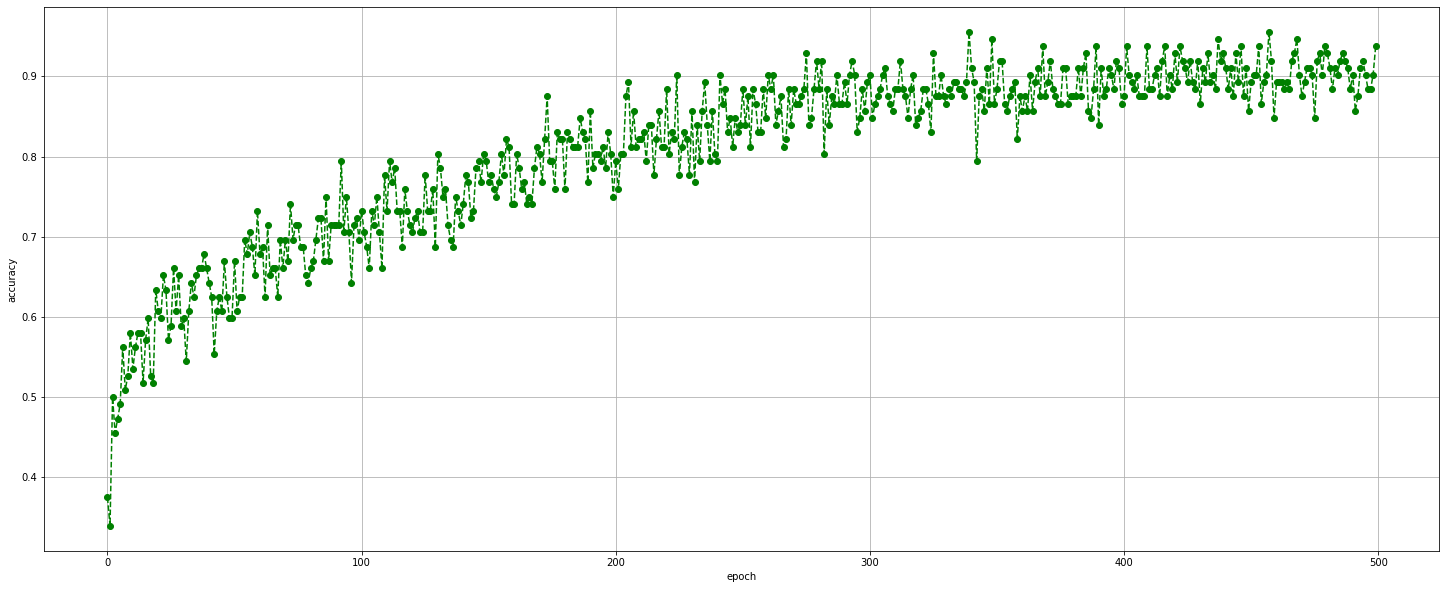

In [37]:
plt.figure(figsize=(25,10))
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.plot(hist.history['accuracy'], 'o', color='green')
plt.plot(hist.history['accuracy'], '--', color='green')
plt.grid()

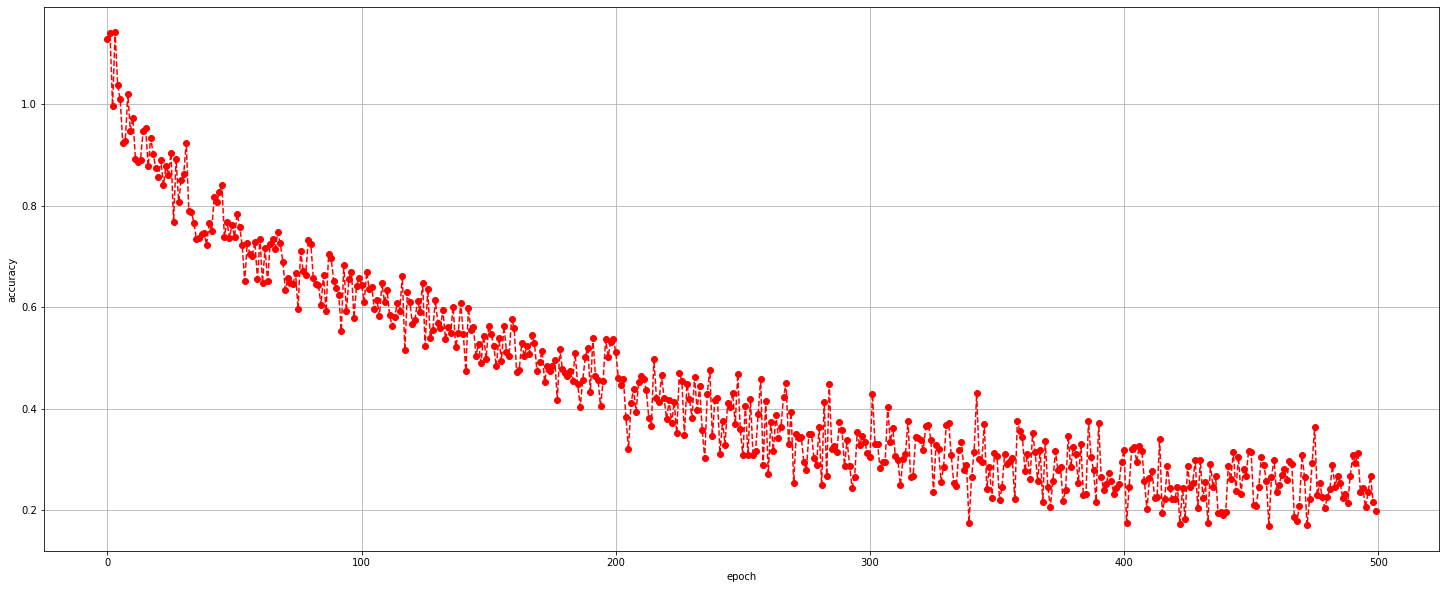

In [38]:
plt.figure(figsize=(25,10))
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.plot(hist.history['loss'], 'o', color='red')
plt.plot(hist.history['loss'], '--', color='red')
plt.grid()

In [46]:
prediction =  modelo.predict(dataValuableTest)
filtredPrediction=[]
p = np.around(prediction, decimals=0)
print('{:25}:{:.2f}'.format('Predictions R2', r2_score(prediction,dataLabelTest)))
print('{:25}:{:.2f}'.format('Rounded predictions R2', r2_score(p,dataLabelTest)))

Predictions R2           :0.97
Rounded predictions R2   :1.00
